In [2]:
from matplotlib import pyplot as plt
import numpy as np    

def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--')
    
    


In [3]:
data = [(1,1),(2,2),(3,2)]
num_features = 1
# data is of the form (x,y)

In [3]:
# now we will attempt to fit a line y = mx + c
# now let us represent the data in the form of a matrix equation
# c + m = 1
# c + 2m = 2
# c + 3m = 2
# [ 1 1 ] * [ c ] = [ 1 ]
# [ 1 2 ]   [ m ]   [ 2 ]
# [ 1 3 ]           [ 2 ]

# Ax = b

# as we can clearly see, this equation is not consistent.
# we will find an approximate solution to this equation by projecting b onto the column space of A.

# for referecence: https://www.youtube.com/watch?v=Y_Ac6KiQ1t0 and the following lecture

In [4]:
# constructing A
height = len(data)
width = num_features + 1
A = np.zeros((height,width))
for x in range(width):
    if x == 0:
        for y in range(height):
            A[y,x] = 1
    else:
        for y in range(height):
            A[y,x] = data[y][x-1]
            
# constructing b
b = np.zeros((height,1))
for x in range(height):
    b[x] = data[x][-1]

In [5]:
# use the formula 
#  P = A(inv(A'.A))A'
# p = P.b
# xHat = ((inv(A'.A))A')b

P = np.dot(np.dot(A,np.linalg.pinv(np.dot(np.transpose(A),A))),np.transpose(A))
xHat = np.dot(np.dot(np.linalg.pinv(np.dot(np.transpose(A),A)),np.transpose(A)),b)
p = np.dot(P,b)

In [6]:
print(p)
print(xHat)

[[1.16666667]
 [1.66666667]
 [2.16666667]]
[[0.66666667]
 [0.5       ]]


In [7]:
x_vals = [x for x,y in data]
y_vals = [y for x,y in data]

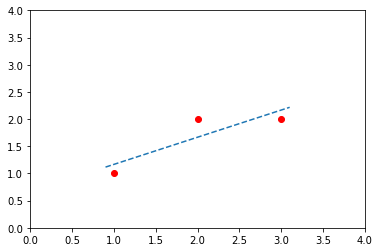

In [8]:
plt.plot(x_vals,y_vals, 'ro')
abline(xHat[1],xHat[0])
axes = plt.gca()
axes.set(xlim=(0, 4), ylim=(0, 4))
plt.show()